# Deep Learning and Reinforcement Learning Final Assignment 

In this assignment we will use neural network to predict heart attack using the dataset derived from Heart Disease Repository. The assignment will begin with Random Forest Classification model to obtain baseline performance and subsequently training the data with neural network. We will then compare the performance of the neural network models in the latter part of the assignment against the performance of the baseline model. 

## Heart Disease Data Set: 
* Heart Disease Repository 
(https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

### Attributes: 
    1. age 
    2. sex 
    3. chest pain type (4 values)
    4. resting blood pressure 
    5. serum cholestoral in mg/dl 
    6. fasting blood sugar > 120 mg/dl 
    7. resting electrocardiographic results (values 0, 1, 2)
    8. maximum heart rate achieved 
    9. exercise induced angina 
    10. oldpeak = ST depression induced by exercise relative to rest 
    11. the slope of the peak exercise ST segment 
    12. number of major vessels (0 - 3) colored by fluorosopy 
    13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
    14. target: 0 = less chance of heart attack, 1 = more chance of heart attack 
    
The data set has 14 variables and 303 samples size. 

## Table of Contents: 

* [Introduction](#Introduction)
* [Data Exploration](#Data_Exploration)
* [Data Preparation](#Data_Preparation)
* [Data Training](#Data_Training)
* [Comparison](#Comparison)

## 1. Introduction <a name="Introduction"></a>

We will try to use the dataset from Heart Disease Repository to predict heart attack. The variable of **`Target`** will be used as a target variable for analysis. Neural network will be used for training purpose and will compare the performance of single hidden layer neural network and double hidden layers neural network models against the performance of the baseline model built from Random Forest Classifier. 

In [1]:
# Import all the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

# SciKit Learn Package 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Keras Package for Deep Learning 
from keras.models import Sequential 
from keras.layers import Dense 
from livelossplot import PlotLossesKeras 
from tensorflow.keras.optimizers import SGD

In [2]:
names = ["Age", "Sex", "Chest_Pain_Type", "Resting_BP", "Serum_Cholestoral", "Fasting_Blood_Sugar", "Resting_Electrocardiographic", "Maximum_Heart_Rate", "Exercise_Induced_Angina", "Oldpeak", "Slope", "Number_of_Vessels", "Thal", "Target"]

df = pd.read_csv('heart.csv', names = names, header = 0)

## 2. Data Exploration <a name="Data_Exploration"></a>

The dataset consists of 303 samples with 14 variables. The variable of **`Target`** will be the target variable for analysis. 

In [3]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(303, 14)
Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_BP', 'Serum_Cholestoral',
       'Fasting_Blood_Sugar', 'Resting_Electrocardiographic',
       'Maximum_Heart_Rate', 'Exercise_Induced_Angina', 'Oldpeak', 'Slope',
       'Number_of_Vessels', 'Thal', 'Target'],
      dtype='object')
Age                               int64
Sex                               int64
Chest_Pain_Type                   int64
Resting_BP                        int64
Serum_Cholestoral                 int64
Fasting_Blood_Sugar               int64
Resting_Electrocardiographic      int64
Maximum_Heart_Rate                int64
Exercise_Induced_Angina           int64
Oldpeak                         float64
Slope                             int64
Number_of_Vessels                 int64
Thal                              int64
Target                            int64
dtype: object


In [4]:
df.head()

,Age,Sex,Chest_Pain_Type,Resting_BP,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic,Maximum_Heart_Rate,Exercise_Induced_Angina,Oldpeak,Slope,Number_of_Vessels,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Identifying the number of unique values for each variable 
df.apply(lambda x: x.nunique())

Age                              41
Sex                               2
Chest_Pain_Type                   4
Resting_BP                       49
Serum_Cholestoral               152
Fasting_Blood_Sugar               2
Resting_Electrocardiographic      3
Maximum_Heart_Rate               91
Exercise_Induced_Angina           2
Oldpeak                          40
Slope                             3
Number_of_Vessels                 5
Thal                              4
Target                            2
dtype: int64

In [6]:
# Will set the variable "Target" as target variable and rest will be independent variable
X = df.drop('Target', axis = 1)
Y = df["Target"]

## 3. Data Preparation <a name="Data_Preparation"></a>

The data set will first split into training and testing sets. The size of the testing set is 40 percent of the dataset and 60 percent will be for training purpose. 

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 48)

In [8]:
np.mean(Y), np.mean(1-Y)

(0.5445544554455446, 0.45544554455445546)

Around 54 percent of the patients fall under the category of less chance getting the heart attack and 45 percent under high chance. 

In [9]:
# Standardization for later training purpose 
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

## 4. Data Training <a name="Data_Training"></a>

### Baseline Performance

To get the baseline performance from Random Forest Classifier: 
- Will set 300 trees for the Random Forest Model 

In [10]:
df_model = RandomForestClassifier(n_estimators=300)
df_model.fit(X_train_norm, Y_train)

RandomForestClassifier(n_estimators=300)

In [11]:
Y_pred_class_RF = df_model.predict(X_test_norm)
Y_pred_prob_RF = df_model.predict_proba(X_test_norm) # Probability of the output for each value 

print('accuracy is {:.3f}'.format(accuracy_score(Y_test,Y_pred_class_RF)))
print('roc-auc is {:.3f}'.format(roc_auc_score(Y_test, Y_pred_prob_RF[:,1]))) # For the positive class 


accuracy is 0.795
roc-auc is 0.893


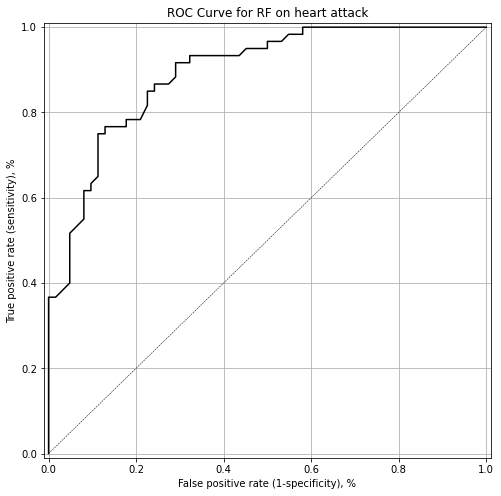

In [12]:
def plot_roc(Y_test, Y_pred, model_name):
    fpr, tpr, thr = roc_curve(Y_test, Y_pred) # fpr - false positive rate, tpr - true positive rate 
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0,1],[0,1], 'k--', linewidth=.5)
    ax.grid(True)
    ax.set(title = 'ROC Curve for {} on heart attack'.format(model_name),
          xlabel='False positive rate (1-specificity), %', ylabel = 'True positive rate (sensitivity), %', xlim=[-0.01, 1.01], ylim = [-0.01, 1.01])

plot_roc(Y_test, Y_pred_prob_RF[:, 1], 'RF')
    

### Single Hidden Layer Neural Network 

The setting for the single layer neural network model will be: 
- 6 nodes for the hidden layer with sigmoid as an activation function for the first hidden layer and final layer
- The learning rate will be 0.0008 with momentum of 0.9
- Will train for 300 epochs 

In [13]:
model_1 = Sequential()
# Creating the first layer with 8 units 13 number of columns
model_1.add(Dense(6, input_shape = (13,), activation = 'sigmoid'))
model_1.add(Dense(1, activation = 'sigmoid'))

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [15]:
opt = SGD(lr = 0.0008, momentum = 0.9)
model_1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, Y_train, validation_data = (X_test_norm, Y_test), epochs = 300)

# SGD = Stochastic Gradient Descent, lr = Learning Rate 

Epoch 1/300
6/6 [==============================] - 0s 20ms/step - loss: 0.7361 - accuracy: 0.4420 - val_loss: 0.7599 - val_accuracy: 0.3852
Epoch 2/300
6/6 [==============================] - 0s 6ms/step - loss: 0.7350 - accuracy: 0.4420 - val_loss: 0.7588 - val_accuracy: 0.3934
Epoch 3/300
6/6 [==============================] - 0s 5ms/step - loss: 0.7331 - accuracy: 0.4530 - val_loss: 0.7573 - val_accuracy: 0.4016
Epoch 4/300
6/6 [==============================] - 0s 7ms/step - loss: 0.7310 - accuracy: 0.4586 - val_loss: 0.7557 - val_accuracy: 0.4098
Epoch 5/300
6/6 [==============================] - 0s 6ms/step - loss: 0.7289 - accuracy: 0.4751 - val_loss: 0.7540 - val_accuracy: 0.4098
Epoch 6/300
6/6 [==============================] - 0s 5ms/step - loss: 0.7265 - accuracy: 0.4751 - val_loss: 0.7523 - val_accuracy: 0.4180
Epoch 7/300
6/6 [==============================] - 0s 6ms/step - loss: 0.7241 - accuracy: 0.4807 - val_loss: 0.7506 - val_accuracy: 0.4262
Epoch 8/300
6/6 [=========

In [16]:
Y_pred_class_nn1 = model_1.predict(X_test_norm)
Y_pred_class_nn1 = np.round(Y_pred_class_nn1).astype(int) 
Y_pred_prob_nn1 = model_1.predict(X_test_norm)

# Note: model_1.predict_classes only available in Tensoreflow 2.5 or later 

print(Y_pred_class_nn1[:10])
print(Y_pred_prob_nn1[:10])

[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
[[0.7605802 ]
 [0.2122561 ]
 [0.44478115]
 [0.6943197 ]
 [0.73350525]
 [0.37795824]
 [0.40912288]
 [0.68121016]
 [0.3002389 ]
 [0.7978651 ]]


In [17]:
print('accuracy is {:.3f}'.format(accuracy_score(Y_test, Y_pred_class_nn1)))
print('roc_auc is {:.3f}'.format(roc_auc_score(Y_test, Y_pred_prob_nn1)))

accuracy is 0.811
roc_auc is 0.910


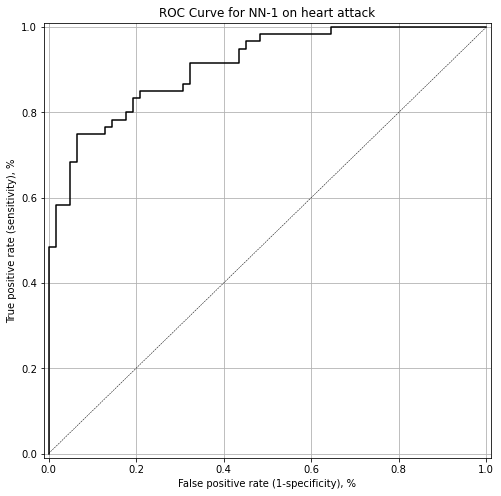

In [18]:
plot_roc(Y_test, Y_pred_prob_nn1, 'NN-1')

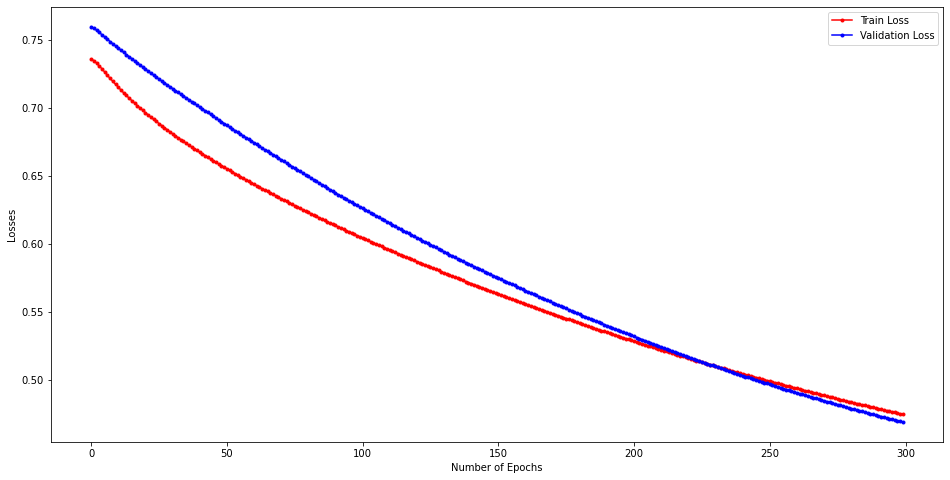

In [19]:
n = len(run_hist_1.history["loss"])
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(range(n), run_hist_1.history["loss"], 'r', marker = '.', label = "Train Loss")
ax.plot(range(n), run_hist_1.history["val_loss"], 'b', marker = '.', label = "Validation Loss")
ax.set(xlabel='Number of Epochs', ylabel='Losses')
ax.legend()

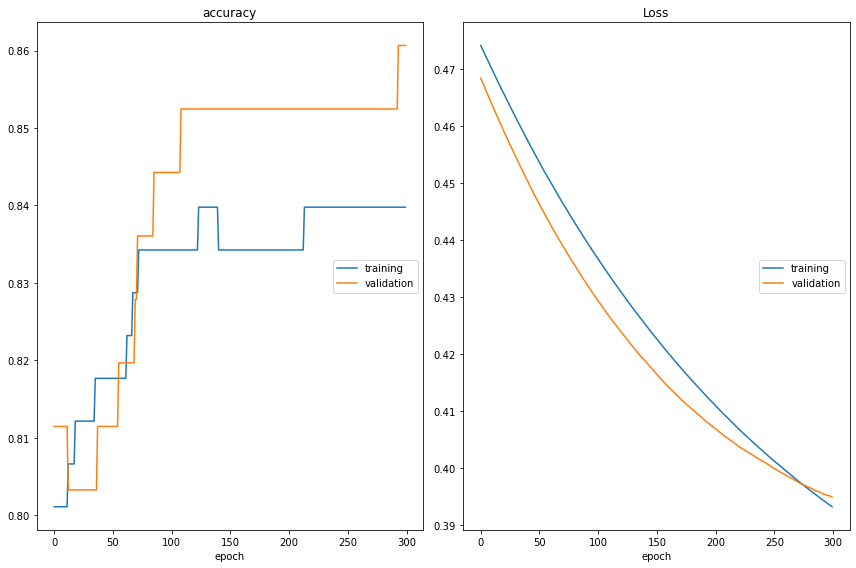

accuracy
	training         	 (min:    0.801, max:    0.840, cur:    0.840)
	validation       	 (min:    0.803, max:    0.861, cur:    0.861)
Loss
	training         	 (min:    0.393, max:    0.474, cur:    0.393)
	validation       	 (min:    0.395, max:    0.468, cur:    0.395)


In [20]:
model_1.fit(X_train_norm, Y_train, epochs = 300, validation_data = (X_test_norm, Y_test), callbacks=[PlotLossesKeras()], verbose=0)

### Multi-Layer Neutrons 

The setting for double hidden layers neural network: 
- Double hidden layers with 6 neutrons for each hidden layer 
- Relu activation function for the two hidden layers and sigmoid for the final layer 
- The learning rate is set to 0.0008 with momentum of 0.9 
- Will train for 300 epochs 

In [21]:
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(13,), activation = "relu"))
model_2.add(Dense(6, activation = "relu"))
model_2.add(Dense(1, activation = "sigmoid"))

In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 84        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [23]:
opt = SGD(lr = 0.0008, momentum = 0.9)
model_2.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, Y_train, validation_data = (X_test_norm, Y_test), epochs = 300)

Epoch 1/300
6/6 [==============================] - 1s 45ms/step - loss: 0.7622 - accuracy: 0.4033 - val_loss: 0.7349 - val_accuracy: 0.4508
Epoch 2/300
6/6 [==============================] - 0s 10ms/step - loss: 0.7607 - accuracy: 0.3978 - val_loss: 0.7327 - val_accuracy: 0.4508
Epoch 3/300
6/6 [==============================] - 0s 9ms/step - loss: 0.7583 - accuracy: 0.3978 - val_loss: 0.7302 - val_accuracy: 0.4590
Epoch 4/300
6/6 [==============================] - 0s 10ms/step - loss: 0.7557 - accuracy: 0.3978 - val_loss: 0.7274 - val_accuracy: 0.4590
Epoch 5/300
6/6 [==============================] - 0s 8ms/step - loss: 0.7530 - accuracy: 0.3978 - val_loss: 0.7248 - val_accuracy: 0.4590
Epoch 6/300
6/6 [==============================] - 0s 10ms/step - loss: 0.7501 - accuracy: 0.3978 - val_loss: 0.7223 - val_accuracy: 0.4672
Epoch 7/300
6/6 [==============================] - 0s 9ms/step - loss: 0.7475 - accuracy: 0.3978 - val_loss: 0.7200 - val_accuracy: 0.4672
Epoch 8/300
6/6 [======

In [24]:
Y_pred_class_nn2 = model_2.predict(X_test_norm)
Y_pred_class_nn2 = np.round(Y_pred_class_nn2).astype(int) 
Y_pred_prob_nn2 = model_2.predict(X_test_norm)

# Note: model_1.predict_classes only available in Tensoreflow 2.5 or later 

print(Y_pred_class_nn2[:10])
print(Y_pred_prob_nn2[:10])

[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
[[0.7133691 ]
 [0.00730419]
 [0.7103059 ]
 [0.7041605 ]
 [0.72669894]
 [0.02621555]
 [0.6903158 ]
 [0.7198428 ]
 [0.07954484]
 [0.69615877]]


In [25]:
print('accuracy is {:.3f}'.format(accuracy_score(Y_test, Y_pred_class_nn2)))
print('roc_auc is {:.3f}'.format(roc_auc_score(Y_test, Y_pred_prob_nn2)))

accuracy is 0.836
roc_auc is 0.908


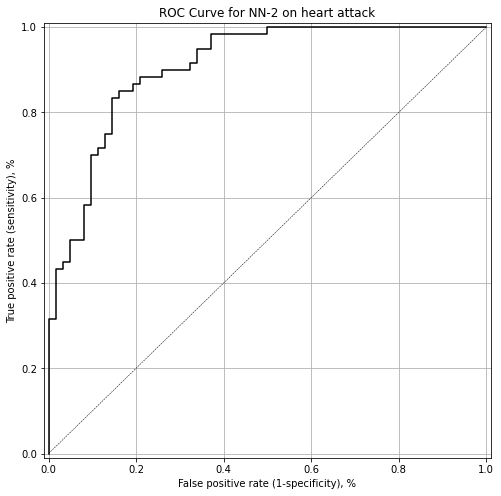

In [26]:
plot_roc(Y_test, Y_pred_prob_nn2, 'NN-2')

In [27]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

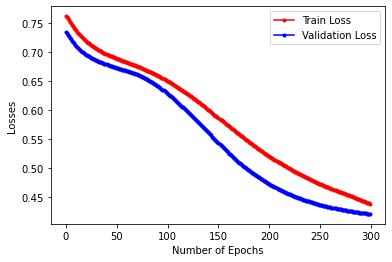

In [28]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history['loss'], 'r', marker = '.', label = "Train Loss")
ax.plot(run_hist_2.history["val_loss"], 'b', marker = '.', label = "Validation Loss")
ax.set(xlabel = 'Number of Epochs', ylabel = 'Losses')
ax.legend()

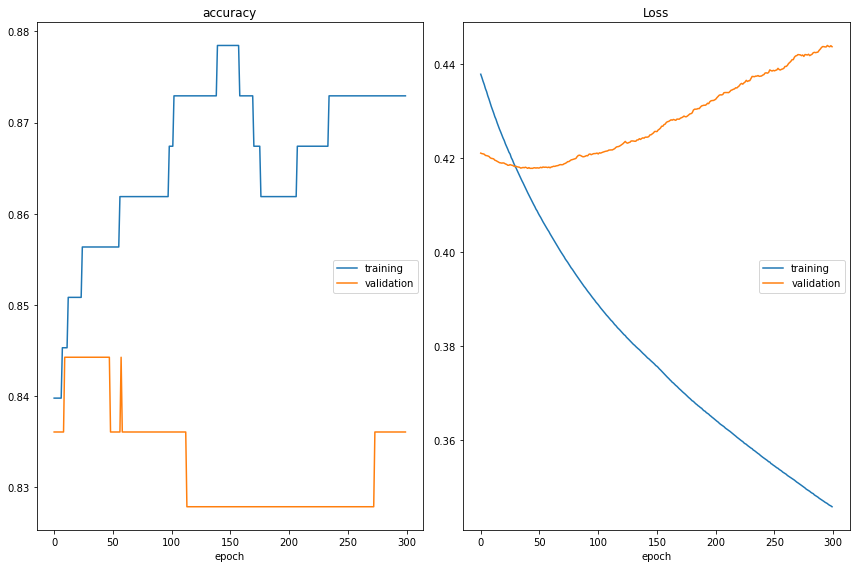

accuracy
	training         	 (min:    0.840, max:    0.878, cur:    0.873)
	validation       	 (min:    0.828, max:    0.844, cur:    0.836)
Loss
	training         	 (min:    0.346, max:    0.438, cur:    0.346)
	validation       	 (min:    0.418, max:    0.444, cur:    0.444)


In [29]:
run_hist_2 = model_2.fit(X_train_norm, Y_train, validation_data = (X_test_norm, Y_test), callbacks=[PlotLossesKeras()], epochs = 300, verbose = 0)

# 5. Comparison <a name="Comparison"></a>

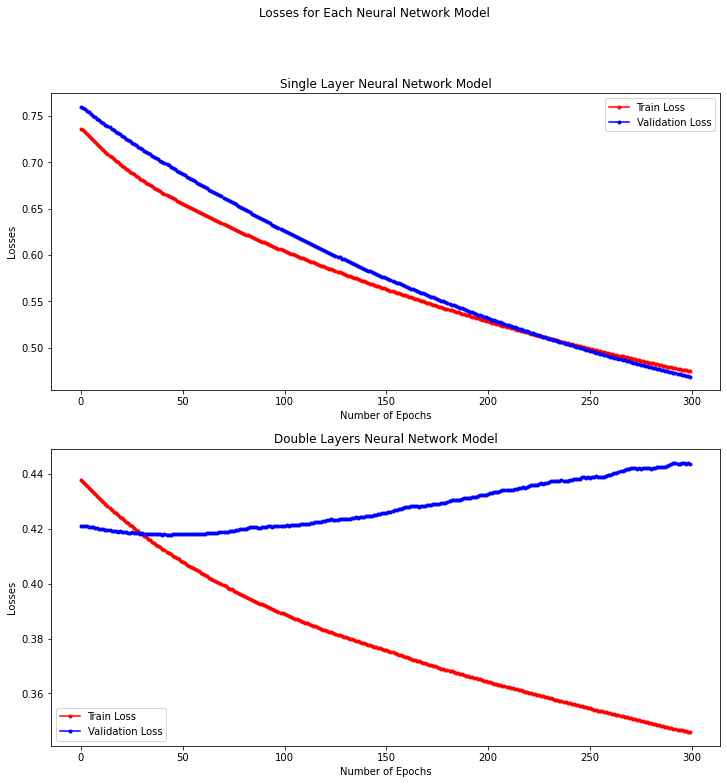

In [30]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (12, 12))
fig.suptitle('Losses for Each Neural Network Model')

ax1.plot(run_hist_1.history["loss"], 'r', marker = '.', label = "Train Loss")
ax1.plot(run_hist_1.history["val_loss"], 'b', marker = '.', label = "Validation Loss")
ax1.set(xlabel='Number of Epochs', ylabel='Losses')
ax1.set_title('Single Layer Neural Network Model')
ax1.legend()

ax2.plot(run_hist_2.history['loss'], 'r', marker = '.', label = "Train Loss")
ax2.plot(run_hist_2.history["val_loss"], 'b', marker = '.', label = "Validation Loss")
ax2.set(xlabel = 'Number of Epochs', ylabel = 'Losses')
ax2.set_title('Double Layers Neural Network Model')
ax2.legend()

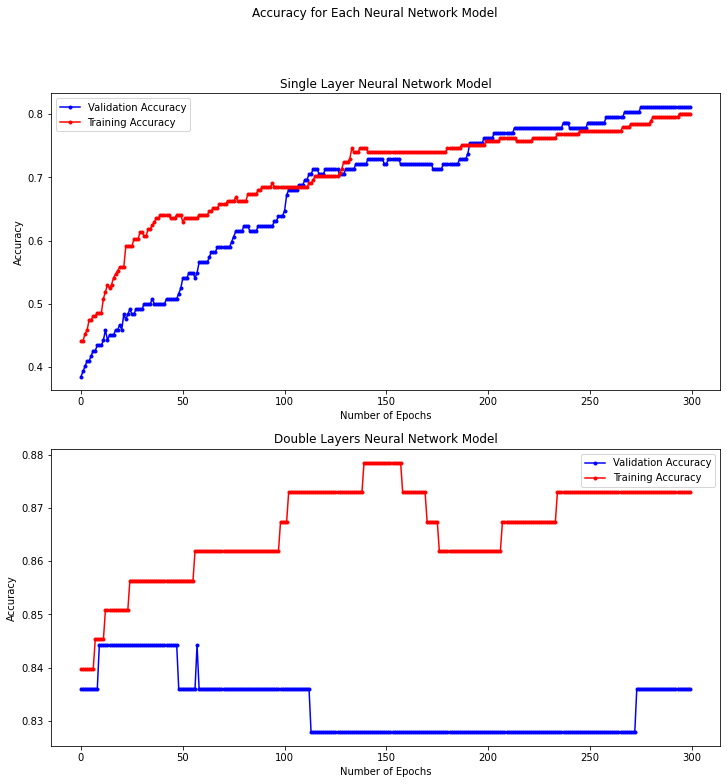

In [31]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (12, 12))
fig.suptitle('Accuracy for Each Neural Network Model')

ax1.plot(run_hist_1.history["val_accuracy"], 'b', marker = '.', label = "Validation Accuracy")
ax1.plot(run_hist_1.history["accuracy"], 'r', marker = '.', label = "Training Accuracy")
ax1.set(xlabel='Number of Epochs', ylabel='Accuracy')
ax1.set_title('Single Layer Neural Network Model')
ax1.legend()

ax2.plot(run_hist_2.history["val_accuracy"], 'b', marker = '.', label = "Validation Accuracy")
ax2.plot(run_hist_2.history["accuracy"], 'r', marker = '.', label = "Training Accuracy")
ax2.set(xlabel='Number of Epochs', ylabel='Accuracy')
ax2.set_title('Double Layers Neural Network Model')
ax2.legend()

In [33]:
df = pd.DataFrame(
    {
        "Model Name": ["Baseline Model (RFC)", "Single Layer Neural Network Model", "Double Layers Neural Network Model"],
        "Accuracy": ["0.795", "0.811", "0.836"],
        "ROC-AUC": ["0.893", "0.910", "0.908"]
    },
    columns = ["Model Name", "Accuracy", "ROC-AUC"],
)

df = df.set_index("Model Name")
df 

,Accuracy,ROC-AUC
Model Name,,
Baseline Model (RFC),0.795,0.893
Single Layer Neural Network Model,0.811,0.910
Double Layers Neural Network Model,0.836,0.908


---
## End of Assignment